In [1]:
%matplotlib inline

import ciw
import matplotlib.pyplot as plt

figsize = (14, 9)

In [2]:
distribution = ['Deterministic', 1]
N = ciw.create_network(Arrival_distributions=[distribution],
                       Service_distributions=[distribution],
                       Number_of_servers=[1])

In [3]:
seed = 0
max_customers = 5000
ciw.seed(seed)
Q = ciw.Simulation(N)
Q.simulate_until_max_customers(max_customers, progress_bar=True)

100%|██████████| 5000/5000 [00:00<00:00, 14312.68it/s]


In [4]:
Q.nodes

[Arrival Node, Node 1, Exit Node]

In [5]:
Q.nodes[-1].all_individuals[6].data_records

[Record(id_number=7, customer_class=0, node=1, arrival_date=7, waiting_time=0, service_start_date=7, service_time=1, service_end_date=8, time_blocked=0, exit_date=8, destination=-1, queue_size_at_arrival=1, queue_size_at_departure=0)]

In [6]:
def get_times(Q):
    """
    Obtain total time and service time of every individual
    """
    individuals = Q.nodes[-1].all_individuals[:-1]
    total_times = [ind.data_records[0].exit_date - ind.data_records[0].arrival_date 
                   for ind in individuals]
    service_times = [ind.data_records[0].service_time 
                     for ind in Q.nodes[-1].all_individuals[:-1]]
    return total_times, service_times

total_times, service_times = get_times(Q)

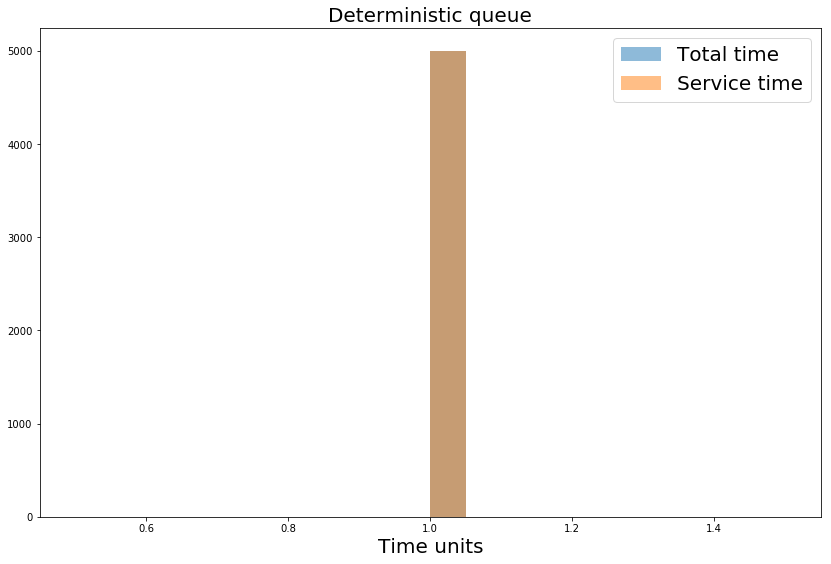

In [7]:
plt.figure(figsize=figsize)
plt.hist(total_times, bins=20, alpha=0.5, label="Total time")
plt.hist(service_times, bins=20, alpha=0.5, label="Service time")
plt.legend(fontsize=20)
plt.title("Deterministic queue", fontsize=20)
plt.xlabel("Time units", fontsize=20)
plt.savefig("assets/deterministic_queue.pdf", transparent=True)

In [8]:
distribution = ['Exponential', 1]
N = ciw.create_network(Arrival_distributions=[distribution],
                       Service_distributions=[distribution],
                       Number_of_servers=[1])
ciw.seed(seed)
Q = ciw.Simulation(N)
Q.simulate_until_max_customers(max_customers, progress_bar=True)

100%|██████████| 5000/5000 [00:00<00:00, 10887.57it/s]


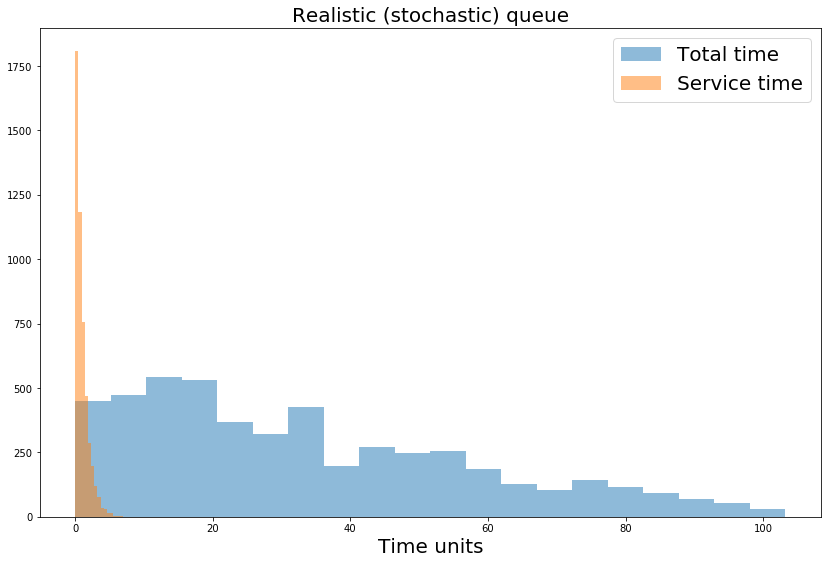

In [9]:
total_times, service_times = get_times(Q)

plt.figure(figsize=figsize)
plt.hist(total_times, bins=20, alpha=0.5, label="Total time")
plt.hist(service_times, bins=20, alpha=0.5, label="Service time")
plt.legend(fontsize=20)
plt.title("Realistic (stochastic) queue", fontsize=20)
plt.xlabel("Time units", fontsize=20)
plt.savefig("assets/stochastic_queue.pdf", transparent=True)